In [1]:
import sys
import os
sys.path.append(
    os.path.dirname(os.path.abspath('.'))
)
from src import QNet, agent_metrics, show_reward
### path load

import numpy as np
import torch
from torchvision import datasets
from matplotlib import pyplot as plt

from settings.shift_funcs import get_funcs

SEED = 0
device = 'cuda:0'

In [2]:
# テストデータのロードまたは作成
funcs = [get_funcs(*delta) for delta in [(2, 2), (2, 0), (0, 2)]]
action_candidates = [f[1] for f in funcs]
np.random.seed(SEED)
test_dataset = datasets.MNIST(root='../open_data/', train=False, download=True).data
train_filter_set = np.random.choice([0, 2], (test_dataset.data.shape[0], 3))  # 保存

In [9]:
# 訓練済みモデルをロード
Qnet = QNet(c=1, m=[20, 20, len(action_candidates) + 1]).to(device)
Qnet.load_state_dict(torch.load('results2/channel01_weight000_seed00/Qnet020000.pth'))

<All keys matched successfully>

In [20]:
test_dataset = test_dataset.to(device)
outdir = 'results2/'
result = agent_metrics(test_dataset, Qnet, action_candidates, gpu=device)

100000


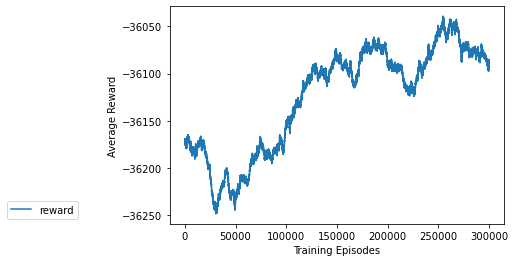

In [11]:
## rewardの確認
reward_path = 'results3/channel01_weight000_seed00/'
ax = plt.subplot(111)
ma = show_reward(ax, dir_path=reward_path, mono=False, n=100000, label='reward')
plt.show()

### channel 2, weight 0.05のQ関数を学習した結果

100000


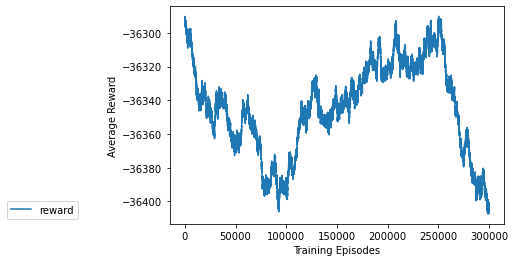

In [15]:
## rewardの確認
reward_path = 'result2/channel01_weight000_seed00/'
ax = plt.subplot(111)
ma = show_reward(ax, dir_path=reward_path, mono=False, n=100000, label='reward')
plt.show()

In [16]:
plt.hist(result[:, -1], bins=np.linspace(-0.1, 1, 100))
plt.show()

NameError: name 'result' is not defined

0.0

In [26]:
data = np.load('data/train_dataset.npz')
train_dataset = data['train_dataset']
train_dataset = torch.from_numpy(train_dataset).to(torch.float)
original_dataset = data['original_dataset']

In [27]:
train_dataset.shape

torch.Size([4000, 28, 28])

In [28]:
original_dataset.shape

(4000, 28, 28)